# Cartpole Gym

The purpose of this notebook is to get familiar with the [OpenAI gym](https://gym.openai.com/docs/) toolkit. Especially we will look at the cartpole environment. 

### Import libraries

In [68]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
%matplotlib inline

### Initialize environment

In [69]:
env = gym.make('CartPole-v0')

### State and action space

In order to frame the problem we can look at the state and action space. The state space consists of four continous bounded variables $x$, $\dot x$, $\theta$, $\dot \theta$ which are the position and velocity of the cart and the pole. The action space consists of a single binary input. 

In [82]:
print(env.observation_space)
print(env.action_space)

Box(4,)
Discrete(2)


We can get the lower and upper boundery of the state space using the following calls. 

In [90]:
print(env.observation_space.low)
print(env.observation_space.high)

[ -4.80000000e+00  -3.40282347e+38  -4.18879020e-01  -3.40282347e+38]
[  4.80000000e+00   3.40282347e+38   4.18879020e-01   3.40282347e+38]


### Random actions

We can use the ```sample()``` method to randomly sample from the spaces. Sampling five times from the action space yeilds the following. Force to the left is zero and force to the right is one. 

In [92]:
for _ in range(5):
    print(env.action_space.sample())

0
1
1
0
1


### Simple test

By initializing a trial we can see that we get an observation of the cartpole before we done anything to it. By taking an action we end up in a new state. We also get a reward of one as long as the pole is held in an upright position. The ```done``` parameter tells us if the the episode is over, which happens when the pole is more than 15 degrees from the vertial or the cart moves more than 2.4 units from the center. The ```info``` variable gives you some additional diagnostic information useful for debugging. 

In [107]:
observation = env.reset() # Reset the environment

In [108]:
observation

array([-0.00257195, -0.01622496, -0.03179775, -0.03013387])

In [109]:
action = 1
observation, reward, done, info = env.step(action)

In [110]:
print(observation)
print(reward)
print(done)
print(info)

[-0.00289645  0.17933822 -0.03240043 -0.33267731]
1.0
False
{}


### Animation 

In order get a more visual representation of what is happening in our environment we can use the ```render()``` method, which outputs a image array. The to make an animation in the ```jupyter``` notebook we use a the ```display_frames_as_gif()``` function below.  

In [105]:
def display_frames_as_gif(frames):
    # Displays a list of frames as a gif, with controls

    fig = plt.figure() # make figure
    ax = fig.add_subplot(111)
    
    # Initial 
    im = ax.imshow(frames[0])
    txt1 = ax.text(0, 80, 'Episode: ', fontsize=15, color='black')
    txt2 = ax.text(0, 160, 'Time: ', fontsize=15, color='black')
    plt.axis('off')

    def animate(i):
        im.set_data(frames[i])
        txt1.set_text('Episode: '+str(episodes[i]))
        txt2.set_text('Time: '+str(time[i]))
        
        return im, [txt1, txt2]

    anim = animation.FuncAnimation(fig, animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))
    
    return anim


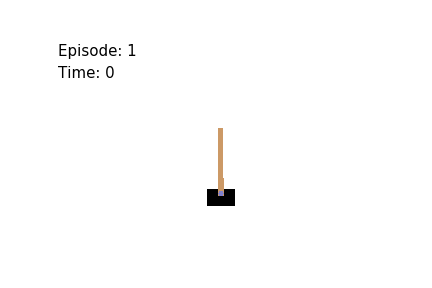
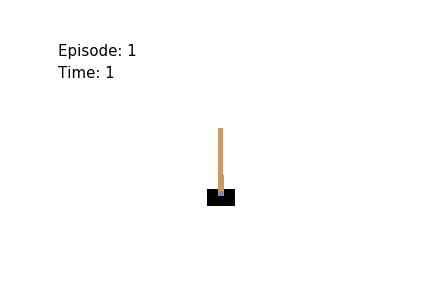
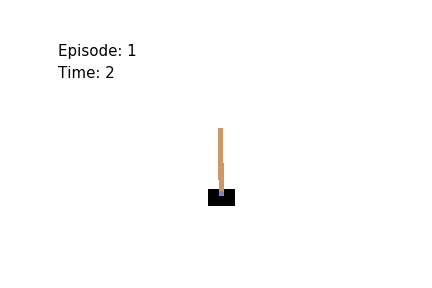
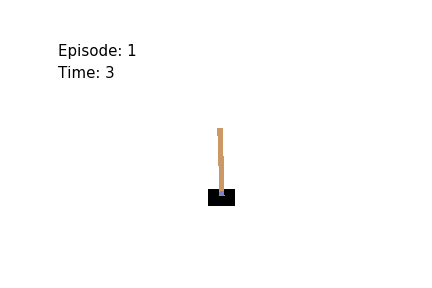
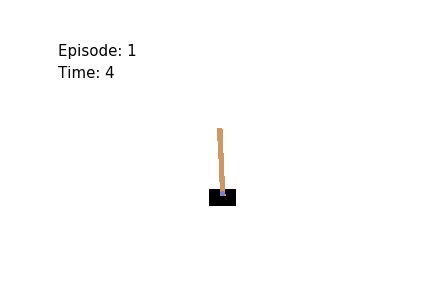
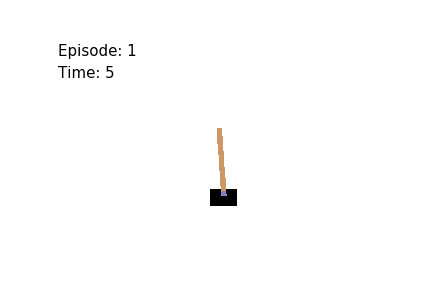
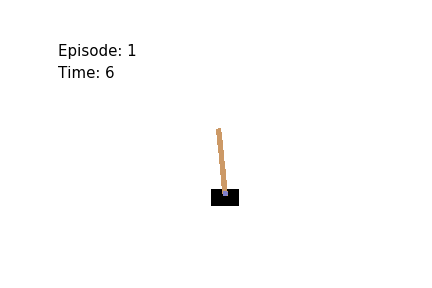
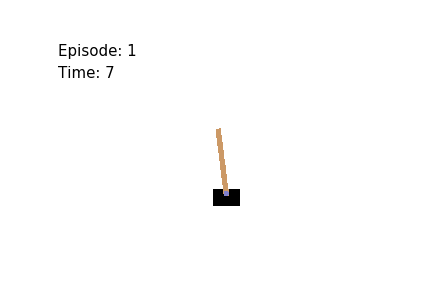
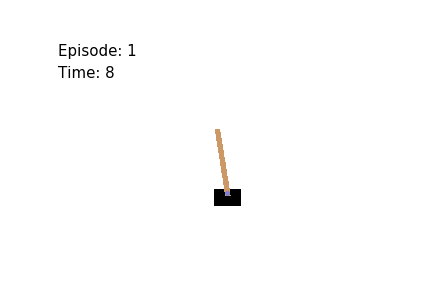
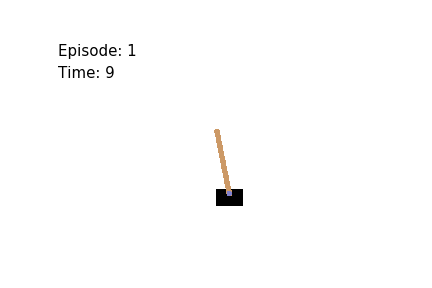
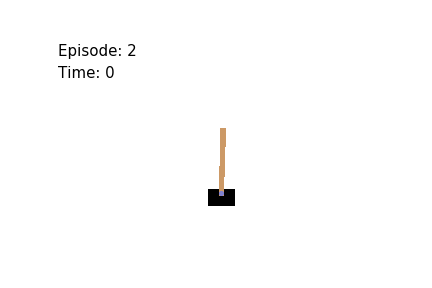
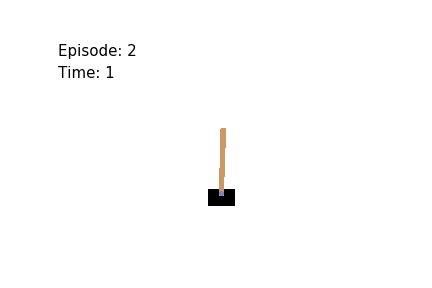
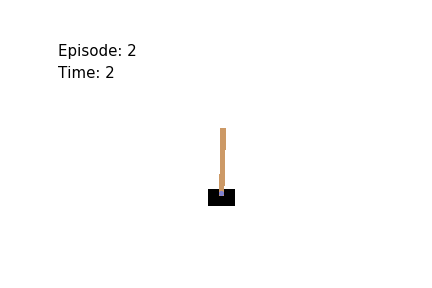
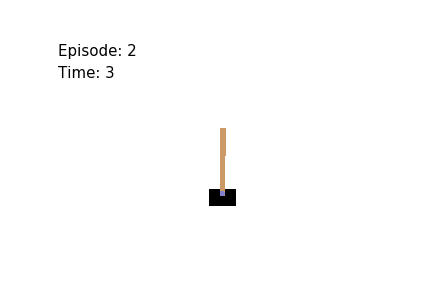
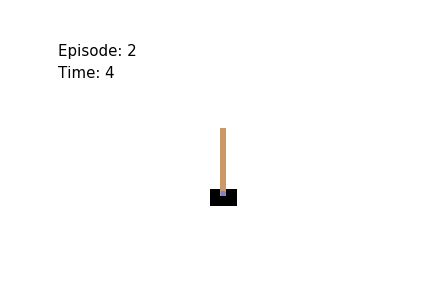
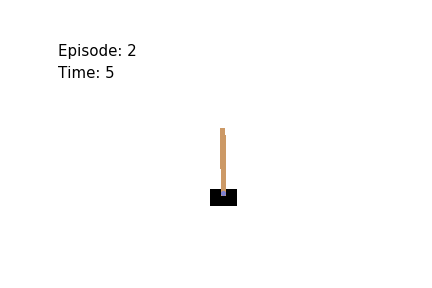
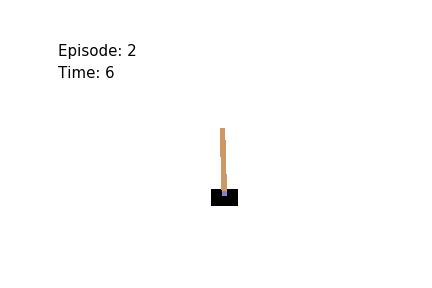
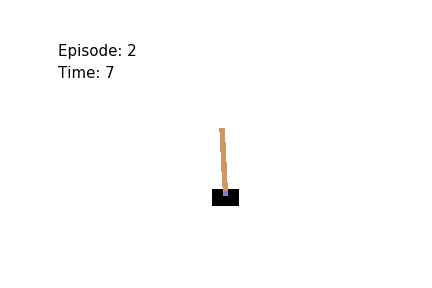
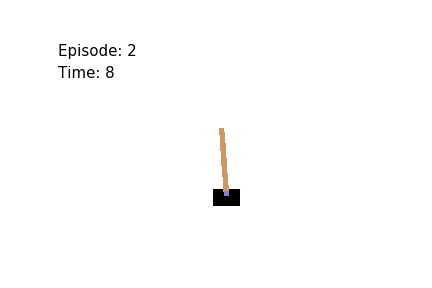
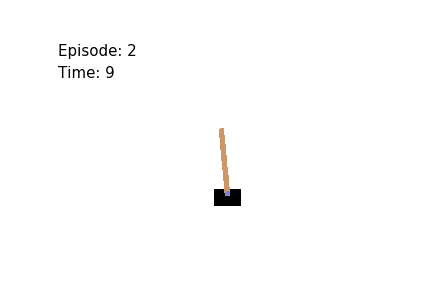
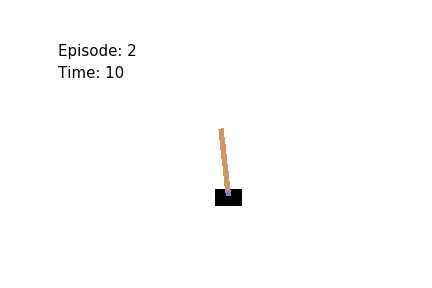
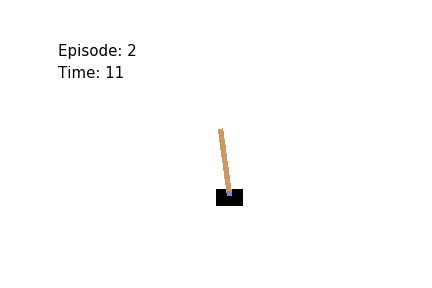
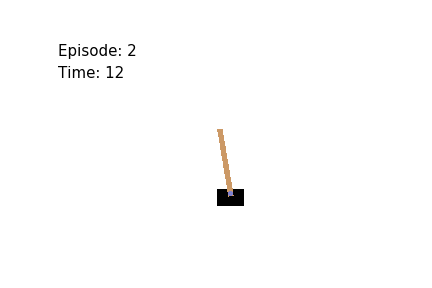
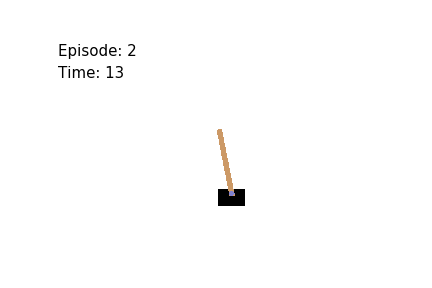
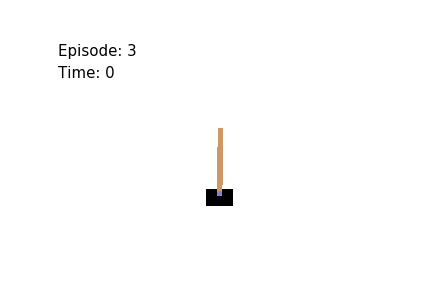
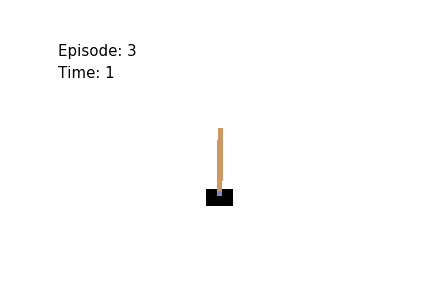
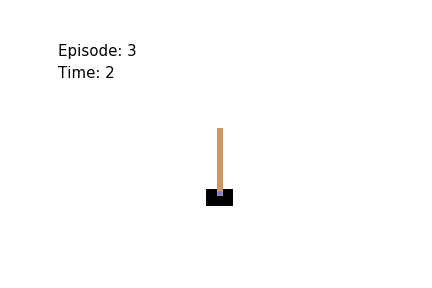
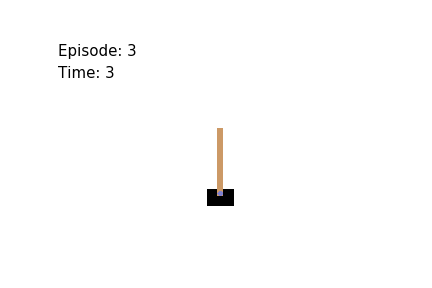
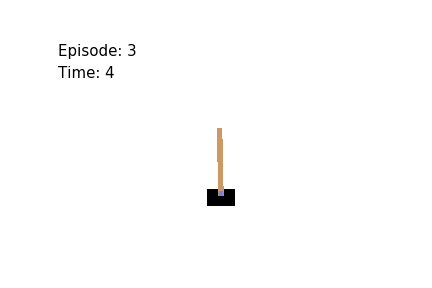
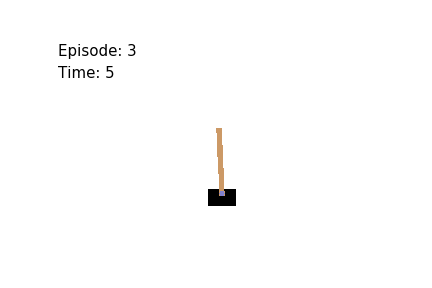
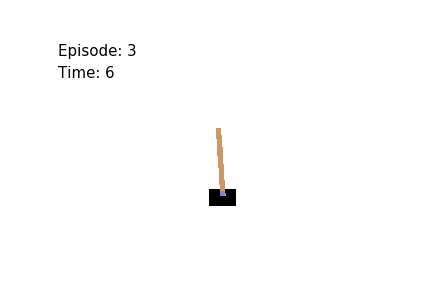
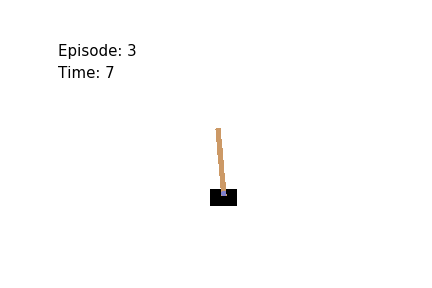
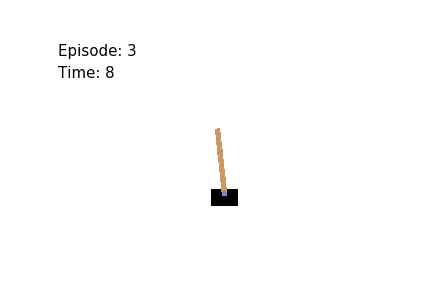
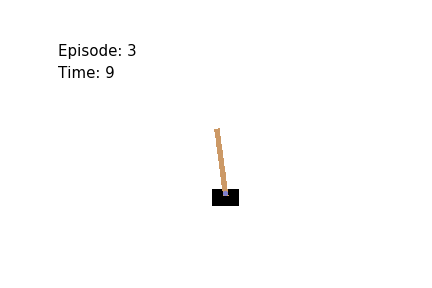
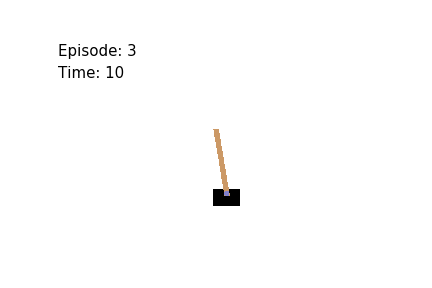
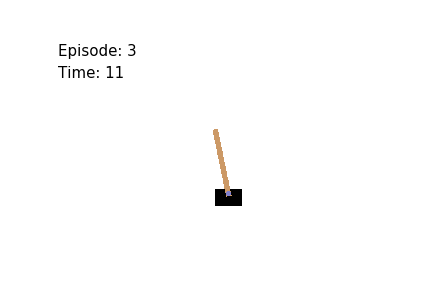
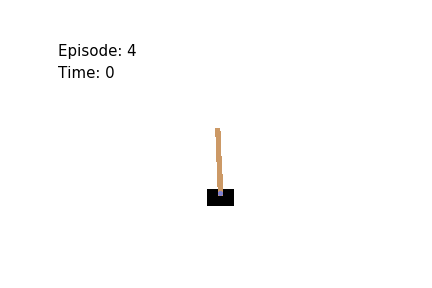
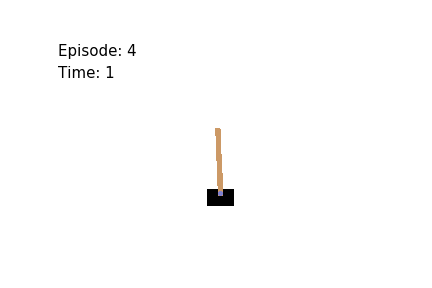
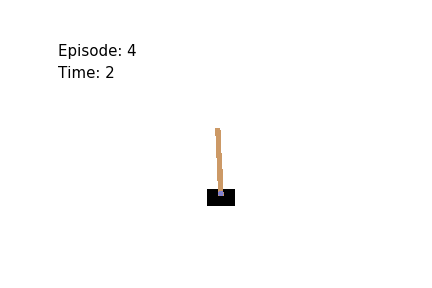
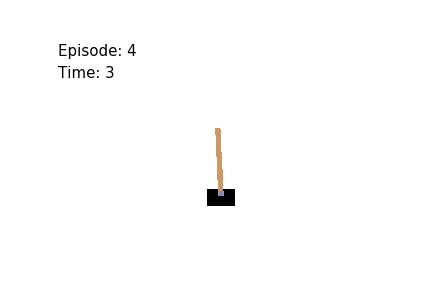
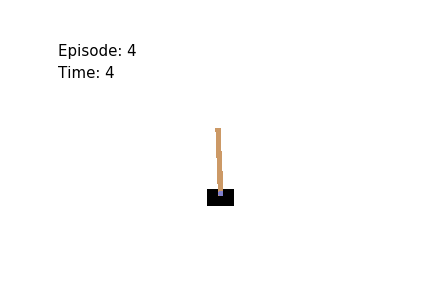
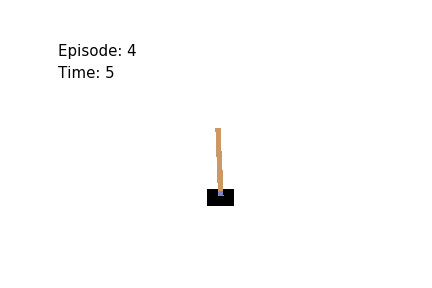
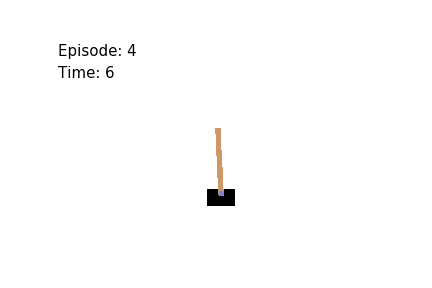
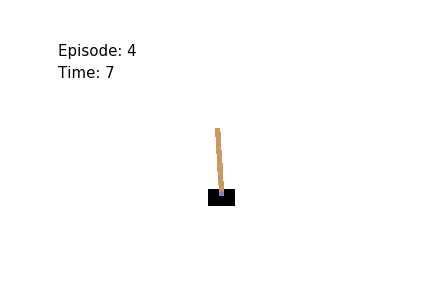
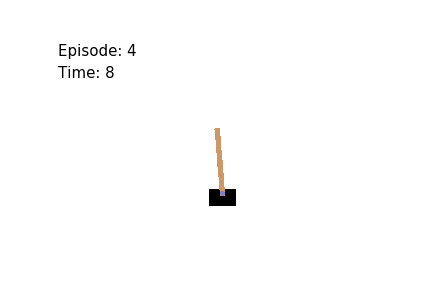
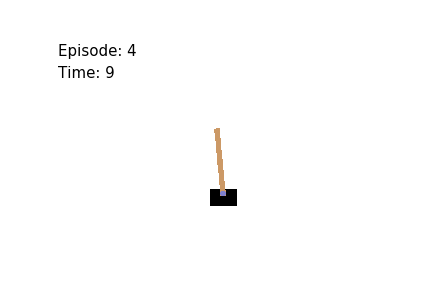
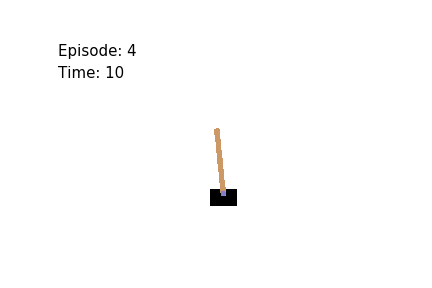
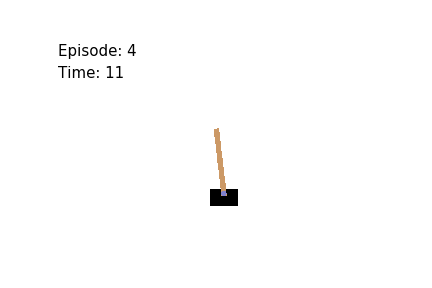
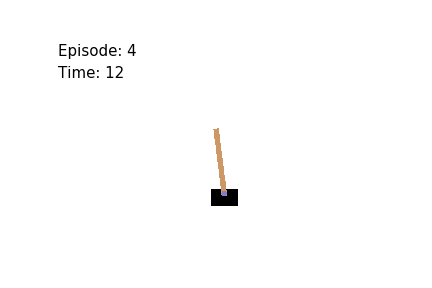
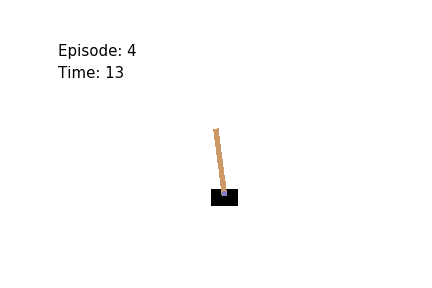
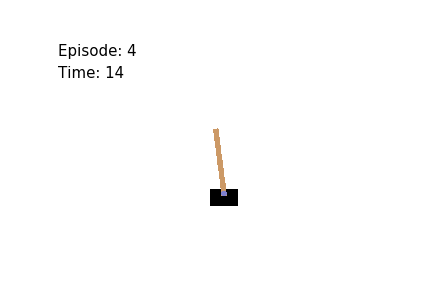
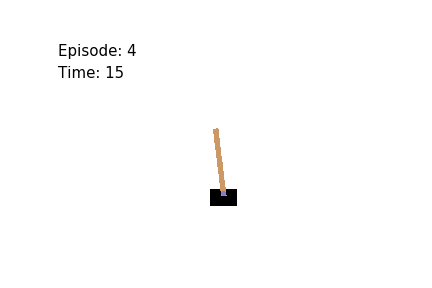
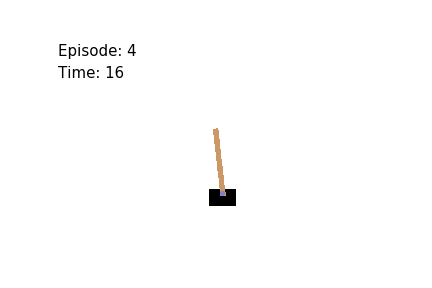
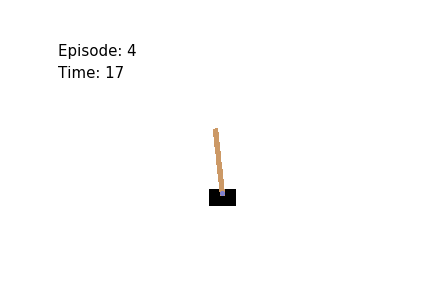
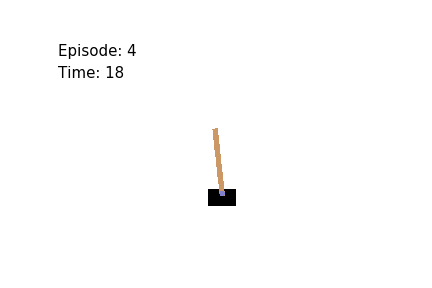
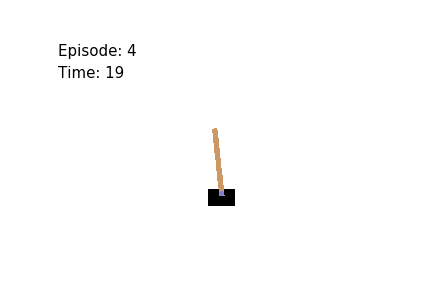
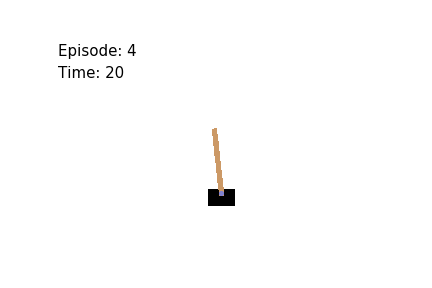
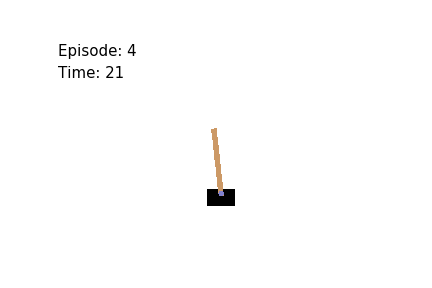
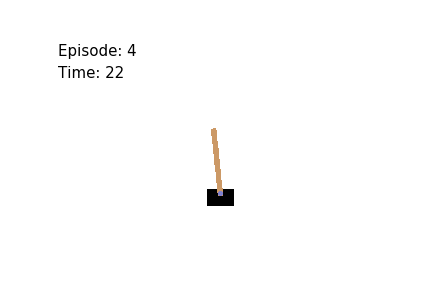
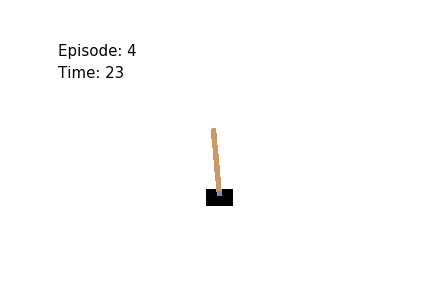
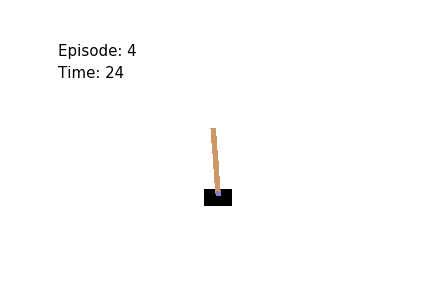
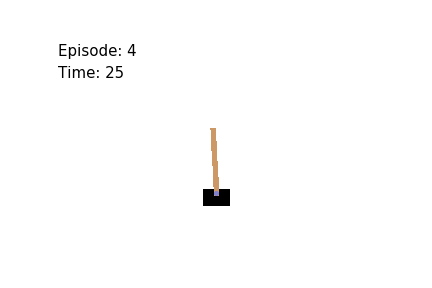
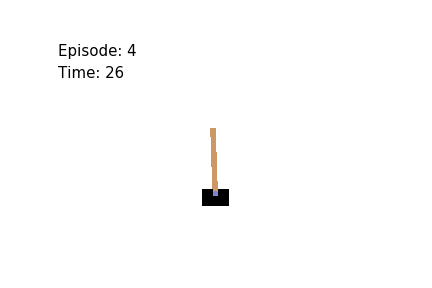
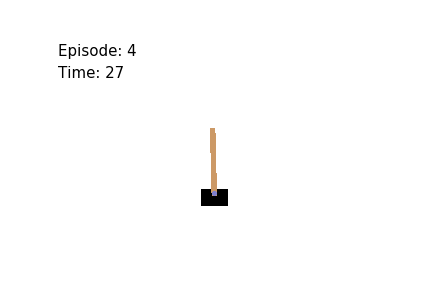
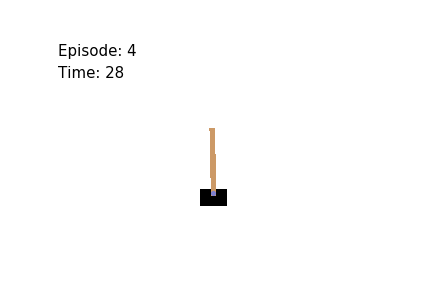
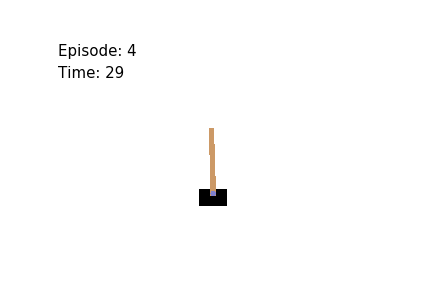
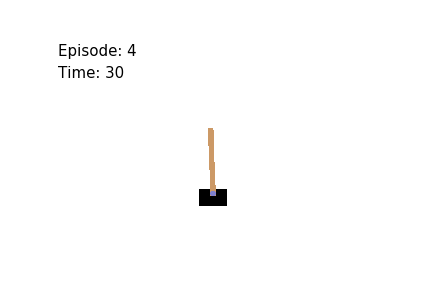
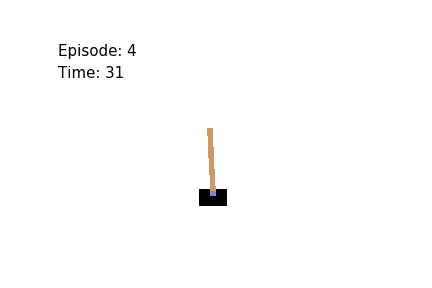
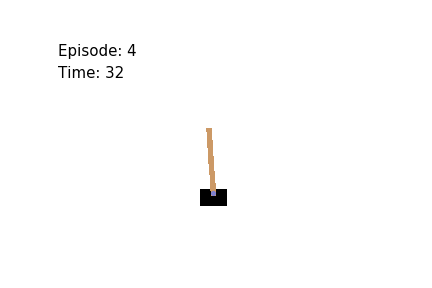
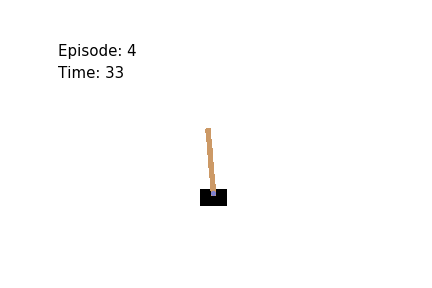
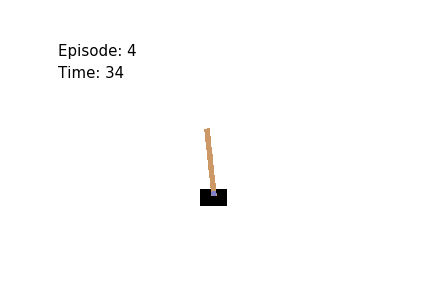
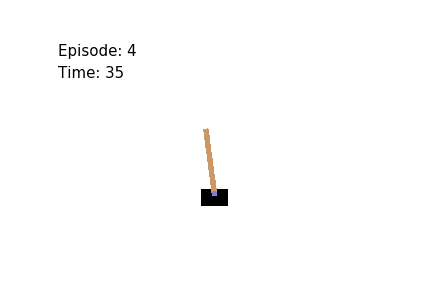
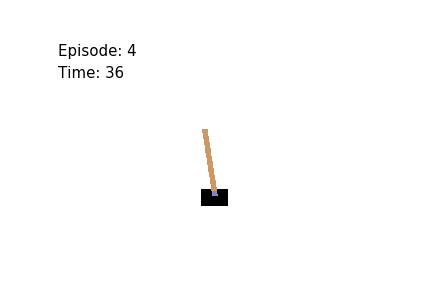
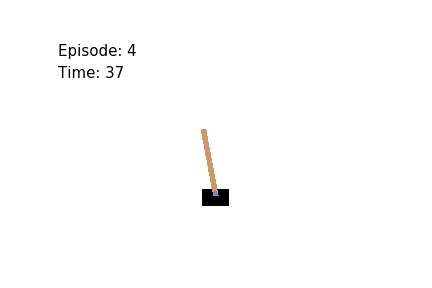
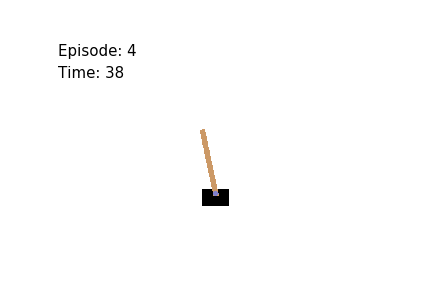
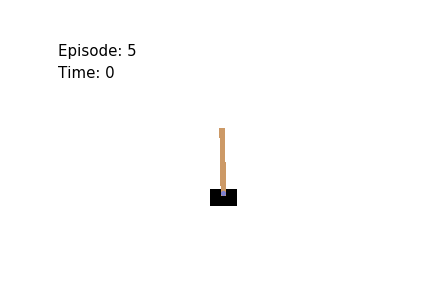
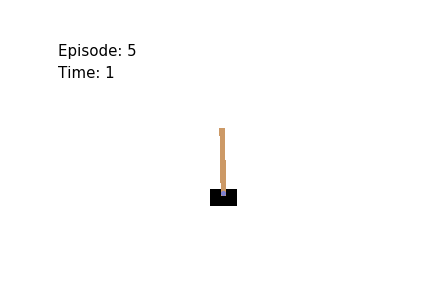
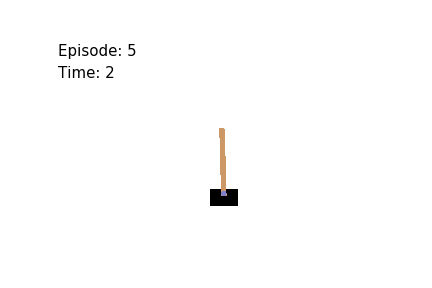
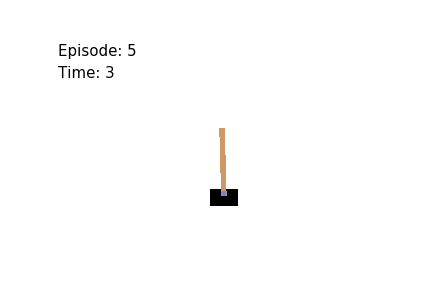
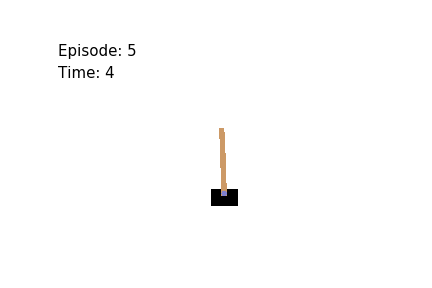
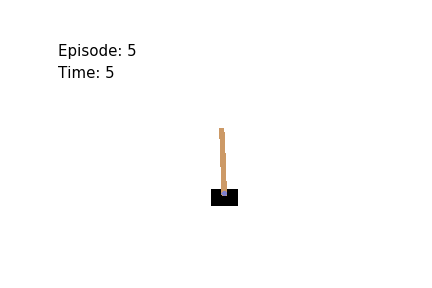
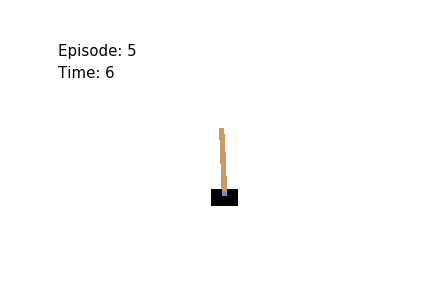
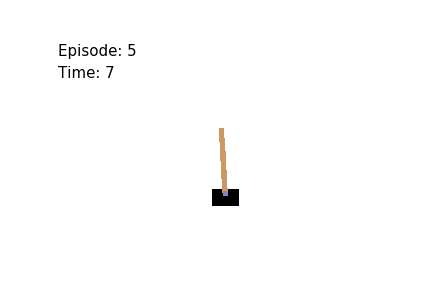
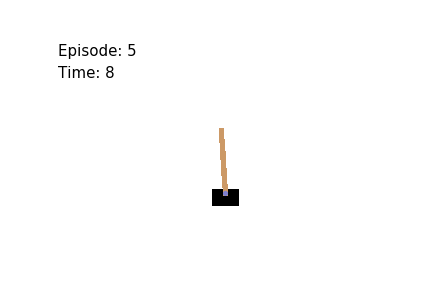
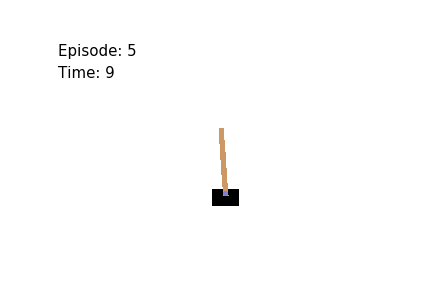
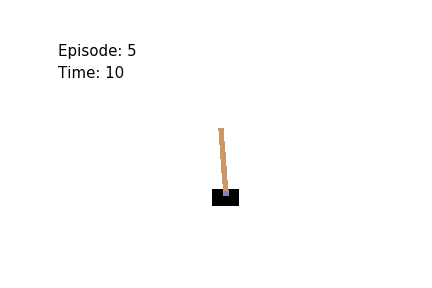
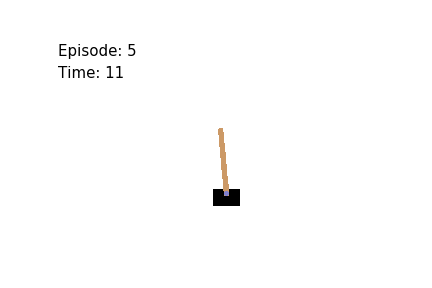
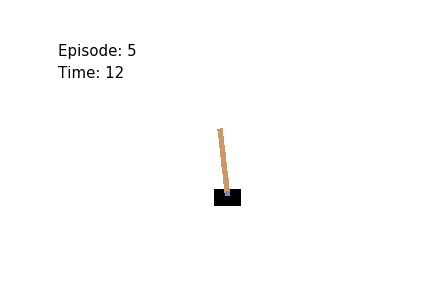
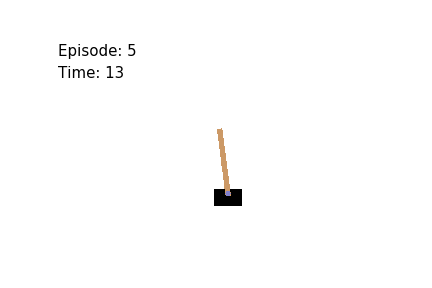
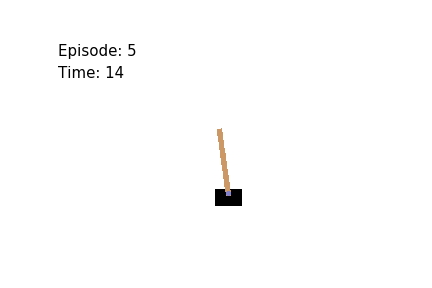
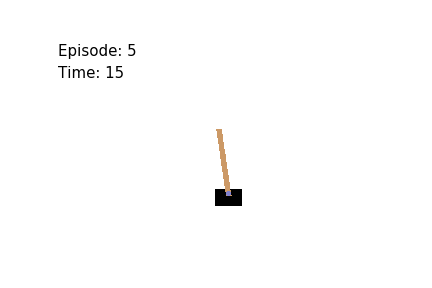
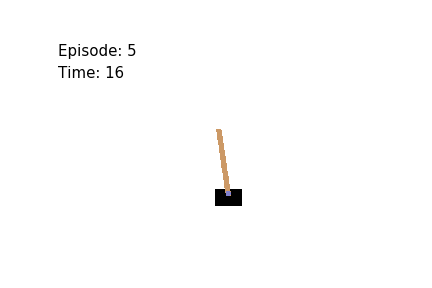
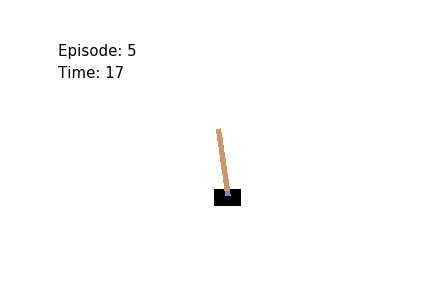
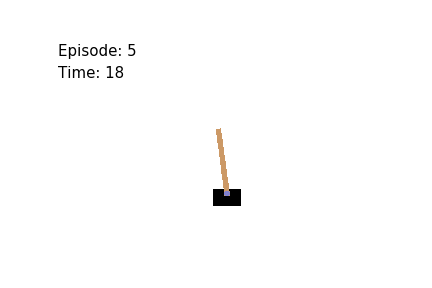
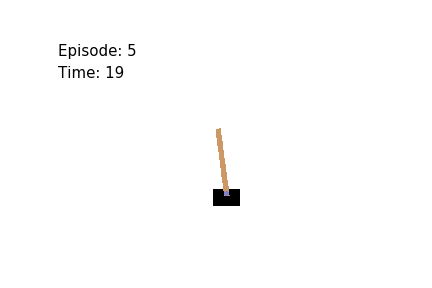
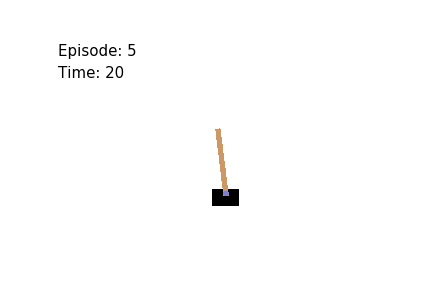
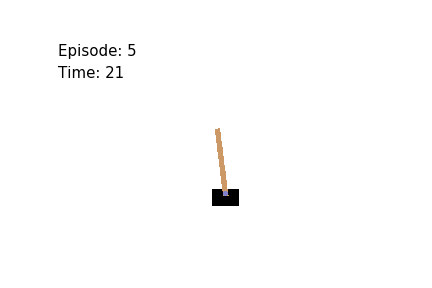
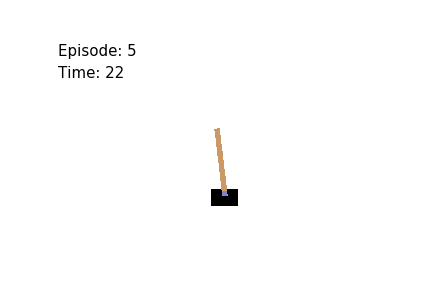
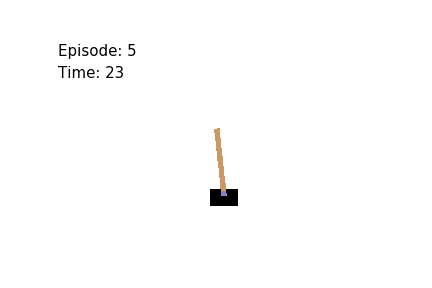
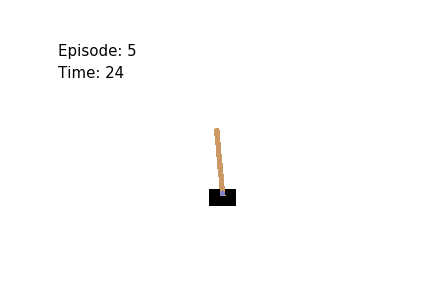
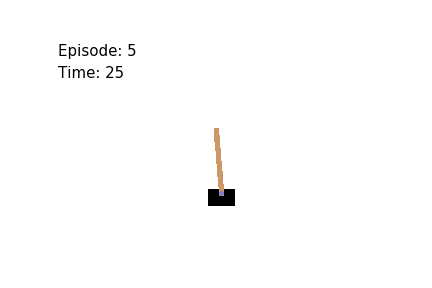
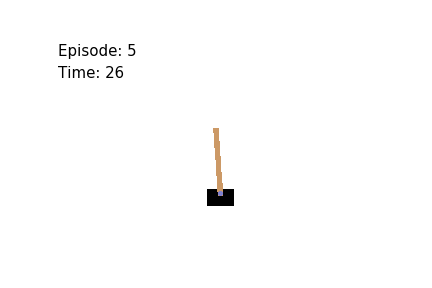
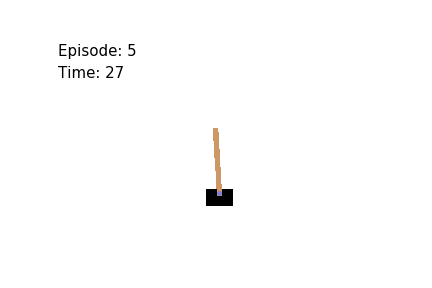
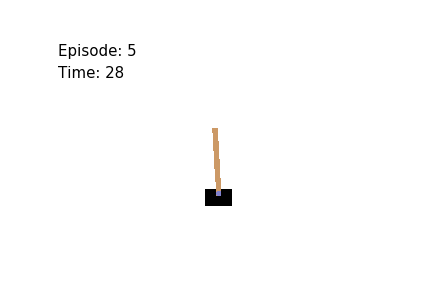
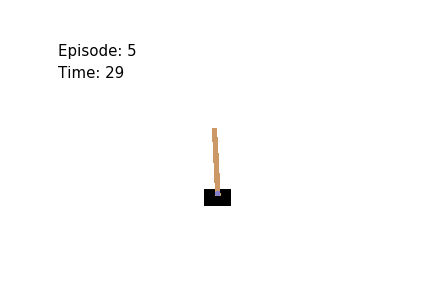
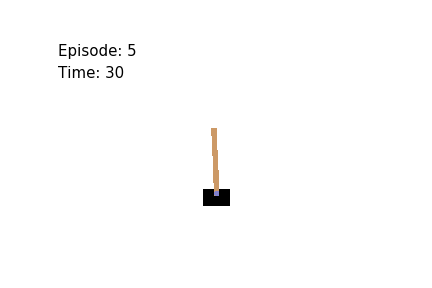
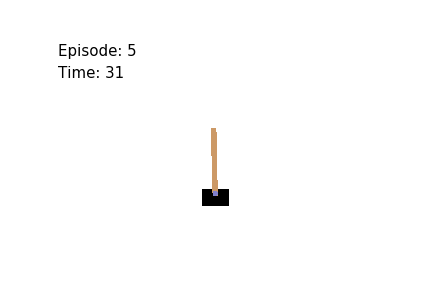
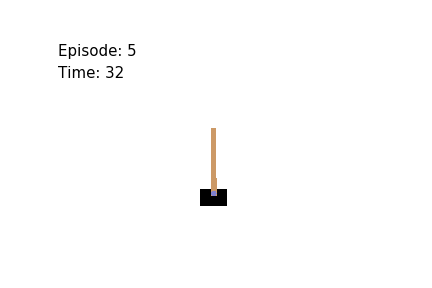
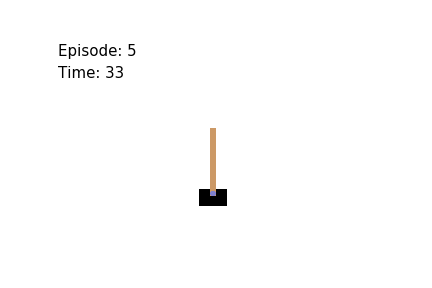
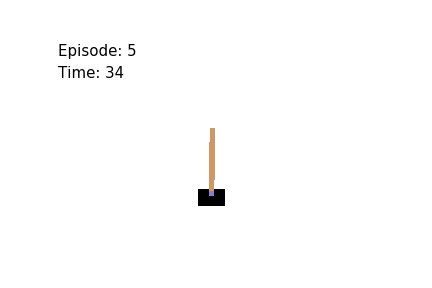
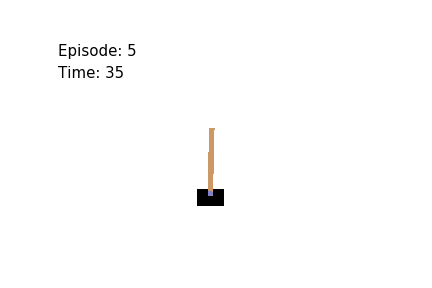
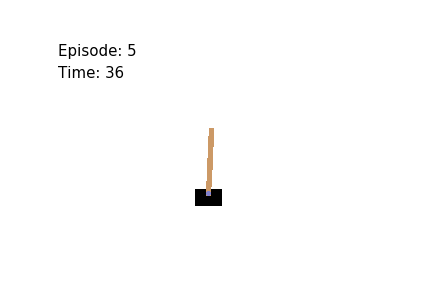
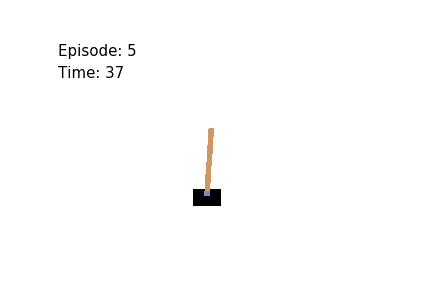
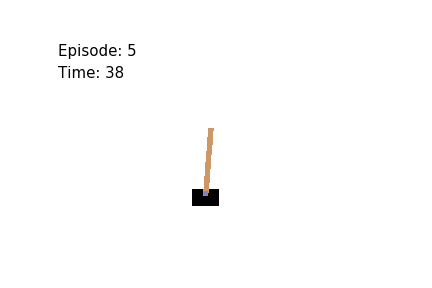
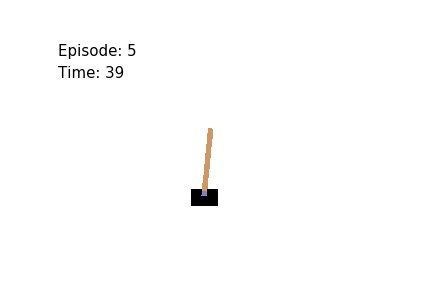
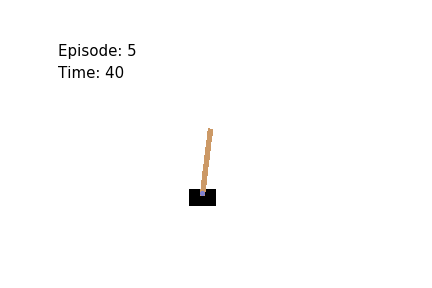
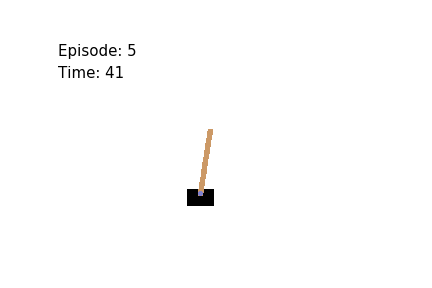
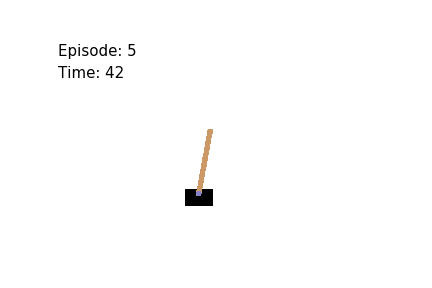
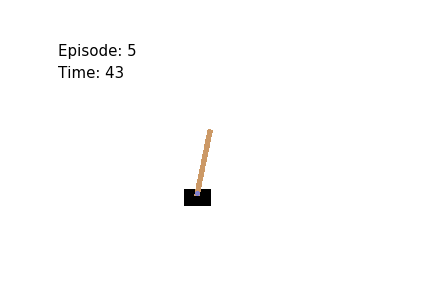

In [106]:
frames, episodes, time = [], [], []
for j in range(5):
    observation = env.reset() # Reset the environment
    for k in range(5000):
        frames.append(env.render(mode='rgb_array'))
        episodes.append(j+1)
        time.append(k)
        action = env.action_space.sample() # Random action
        observation, reward, done, info = env.step(action)
        if done: # If the game is over quit
            break
env.render(close=True)
anim = display_frames_as_gif(frames)

In [72]:
# Save animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save('cartpole-random.mp4', writer=writer)

In [112]:
if not None: 
    print('Pelle')

Pelle
